# Linear Regression with SGD on Bostons Home Data set

## 1. Reading Boston Home Data set

In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection  import train_test_split




boston = load_boston()
print(boston.data.shape)

import warnings
warnings.filterwarnings("ignore")

(506, 13)


In [2]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Data set variabe types**

-  `CRIM` => numerical
-  `ZN` => numerical
- `INDUS` => numerical
- `CHAS` => nuerical
- `NOX` => numerical
-  `RM` => numerical
- `AGE` => numerical
- `DIS` => numerical
- `RAD` => numerical
- `TAX` => numerical
- `PTRATIO` => numerical
-  `B` => numerical
- `LSTAT` => numerical

In [4]:
#converting dataset to dataframe
bos = pd.DataFrame(data=boston.data)
bos.columns = boston.feature_names
price = boston.target

data_train, data_test, label_trian, label_test = train_test_split(bos, price, test_size = 0.33, random_state = 5)
print(data_train.shape)
print(data_test.shape)

(339, 13)
(167, 13)


## 2. Standardising train and test data set

since all the given data is numerical we can standardise all the dataser in a single pre processing stpe using StandardScalar

In [5]:
# applying column standardization on train and test data
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train=s.fit_transform(np.array(data_train))
x_test=s.transform(np.array(data_test))

#converting data to data to dataframe
data_train_std = pd.DataFrame(data = x_train)
data_test_std  = pd.DataFrame(data = x_test)

data_train_std.columns = boston.feature_names
data_test_std.columns = boston.feature_names

print(data_train_std.head(4))
print(data_test_std.head(4))

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.911839 -0.502419  1.072305  ...  0.808078 -2.842959  1.523203
1 -0.411727 -0.502419 -1.129795  ... -0.304174  0.427436 -0.995240
2  0.124583 -0.502419  1.072305  ...  0.808078 -0.053353 -0.765646
3 -0.406208  0.839388 -0.901940  ... -0.860301  0.152292 -0.184576

[4 rows x 13 columns]
       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.372923 -0.502419 -0.711561  ... -0.489550  0.318974 -1.331126
1 -0.414165  3.075732 -0.898942  ...  0.344640  0.427436 -1.108619
2 -0.412891 -0.502419 -1.129795  ... -0.304174  0.373661 -0.526132
3  0.905605 -0.502419  1.072305  ...  0.808078  0.427436  3.153033

[4 rows x 13 columns]


## 3. Applying Simple Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm = LinearRegression()
lm.fit(data_train_std, label_trian)

y_pred = lm.predict(data_test_std)


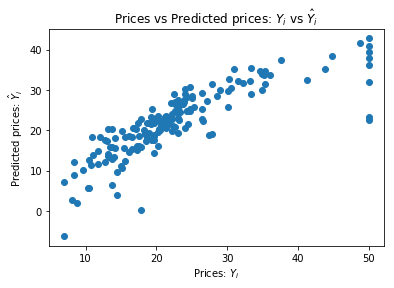

In [7]:
import matplotlib.pyplot as plt

plt.scatter(label_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

**Error in each test prediction**

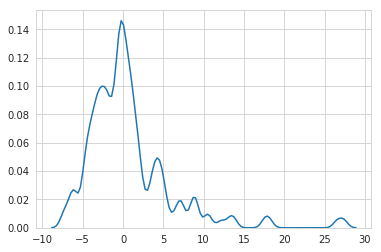

In [8]:
delta_y = label_test - y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

**prediction label plot**

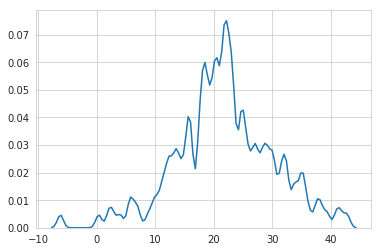

In [9]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_pred), bw=0.5)
plt.show()

**Total Mean squared Error in normal Linear Regression**

In [10]:
print("length of prediction errors array", len(delta_y))

SE = 0


for i in delta_y:
  sq = i**2
  SE += sq

#mean squere error
MSE = SE / len(delta_y)
print(MSE)
  

length of prediction errors array 167
28.53045876597462


## 3. Applying SGD Algorithm

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [0]:
#we use SGD function module of sklearn


def applySGD(iterations, train_data, labels_train, test_data, labels_test):
  
  print("model started")
  #fit sklearn SGD function\
  model = SGDRegressor(alpha = 0.0001, eta0 = 0.01, learning_rate = 'constant', penalty = None,max_iter = iterations)
  model.fit(train_data, labels_train)
  
  y_pred = model.predict(test_data)
  
  #plotting predicted labels vs actual
  plt.scatter(labels_test, y_pred)
  plt.title("scatter plot between predicted labels and actual labels")
  plt.xlabel("acutal y")
  plt.ylabel("predicted  y")
  plt.grid(b=True, linewidth=0.5)
  plt.show()
  
  #mean squared error
  mse = mean_squared_error(labels_test, y_pred)
  print("mean squared error", mse)
  
  
  return ['sklearn', iterations, 'optimal', mse, model.coef_, model.intercept_]
  


In [0]:
import math
#function to calculate current y
def currentY(w, x, b):
  y_curr = np.dot(w,x) + b
  
  return y_curr

#custom step function
def stepFunction(r, i):
  r = r / (math.exp(i))
  return r

def returnPredictedArr(data, w_new, b_new):
  y_predicted = []
  for l in range(len(data)):
    y_pred = currentY(w_new, data[l].reshape(13,1), b_new);
    y_predicted.append(y_pred[0, 0])
  
  return y_predicted


In [0]:
from tqdm import tqdm
#  applying sgd using custome function

def Custom_SGD(iterations, train_data, labels_train, test_data, labels_test, batch_size):
  
  #create SGD function
  
  #initial values
  w_new = np.zeros(shape = (1,13))
  b_new = 0
  r = 1
  i = 1
  
  combined_x_trian = train_data
  combined_x_trian['price'] = labels_train
  
  #take random data points equal to batch_size
  combined_trainn_sample = combined_x_trian.sample(batch_size)
  train_data_labels = combined_trainn_sample['price']
  train_data = combined_trainn_sample.drop('price', axis = 1)
  y = np.array(train_data_labels)
  x = np.array(train_data)
  
  #initial mean squared error on test data
  train_loss = 0
  
  print(currentY(w_new, x[1].reshape(13,1), b_new)[0][0])
  
  for i in range(iterations):
    #print(w_new)
    z = 0
    q = 0
    #get derivate of lossfn for hyper plane
    for j in range(batch_size):
      y_curr = currentY(w_new, x[j].reshape(13,1), b_new)
      
      z += (y[j] - y_curr[0, 0]) * (x[j]).reshape(1,13)
      q += (y[j] - y_curr[0, 0])
    
    #step size = 0.01
    w_new = w_new - 2 * 0.01 * (z * (-1/ x.shape[0]))
    b_new = b_new - 2 * 0.01 * (q * (-1/ x.shape[0]))
    
    #print(y[1] - currentY(w_new, x[1].reshape(13,1), b_new)[0][0])
    train_loss_new = mean_squared_error(y, returnPredictedArr(x, w_new, b_new))
    #we stop the loop when train error change in each iteration is less than 0.01
    if(abs(train_loss - train_loss_new) <= 0.0001):
      print(i)
      break
    else:
      train_loss = train_loss_new
    
  
  #print("iterations", len(test_data))
  #print(test_data.loc[1])
  #print(x[1].reshape(13,1))
  #predictions on test data
  y_predicted = []
  print('*' * 50)
  print(b_new)
  print(w_new)
  print('*' * 50)
  #print(test_data.loc[j].shape)
  for l in tqdm(range(len(test_data))):
    y_pred = currentY(w_new, np.array(test_data.loc[l]).reshape(13,1), b_new);
    y_predicted.append(y_pred[0, 0])
  
  #plotting predicted labels vs actual
  #print(labels_test[:10])
  #print(y_predicted[:10])
  print('scatter plot to view the relationship between actual label and predicted label')
  plt.scatter(labels_test, y_predicted)
  plt.title("scatter plot between predicted labels and actual labels")
  plt.xlabel("acutal y")
  plt.ylabel("predicted  y")
  plt.grid(b=True, linewidth=0.5)
  plt.show()
  
  #mean squared error
  mse = mean_squared_error(labels_test, y_predicted)
  print("mean squared error", mse)
    
  return  ['custom', iterations, 'custom', mse, w_new, b_new]
      
  

# Apply Sklearn SGD

model started


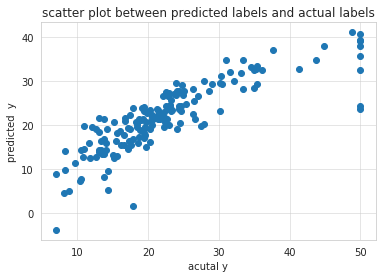

mean squared error 28.008636071036307


In [15]:
#running sklearn based model
sklearn_arr = applySGD(1000, data_train_std, label_trian, data_test_std, label_test)

# Apply Custom SGD

0.0


100%|██████████| 167/167 [00:00<00:00, 3984.83it/s]

**************************************************
22.714387338974802
[[ 0.51942653  1.23753076 -0.09055095 -0.09807322 -1.81918432  2.56692772
   1.27889887 -3.29967681  1.99931384 -0.9354744  -1.57738681  1.59734812
  -6.9646985 ]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


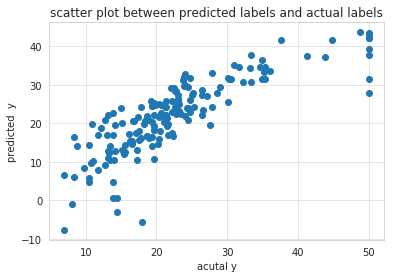

mean squared error 32.25754620617092
0.0


100%|██████████| 167/167 [00:00<00:00, 3420.88it/s]

795
**************************************************
22.837004593319662
[[-1.35912793  0.14978714  0.06152162  1.12323599  0.25679872  4.72415576
  -1.25789076 -2.769728    0.42326111 -0.77834026 -1.27335442  1.42481939
  -4.44946445]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


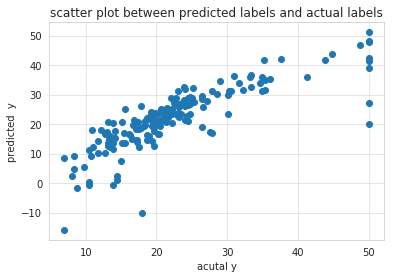

mean squared error 36.423345809275204
0.0


100%|██████████| 167/167 [00:00<00:00, 3818.68it/s]

**************************************************
21.97974526592012
[[-1.50406638  1.59472675 -0.32345317 -0.53436808 -1.21924155  2.12402867
  -0.1695971  -3.23600482  3.94771247 -2.92462251 -1.91861857  1.11235933
  -3.12822329]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


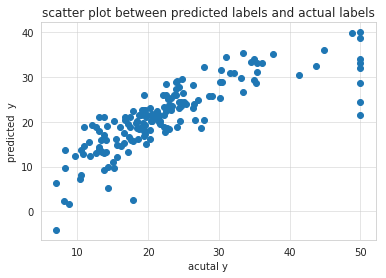

mean squared error 33.35241992590101
0.0


100%|██████████| 167/167 [00:00<00:00, 3990.23it/s]

**************************************************
22.43958340110028
[[-0.44507185  0.69716004 -1.32638098  0.21167064 -1.50089474  1.37166895
  -0.74769056 -2.79443045  1.88073729 -2.01956203 -2.21195315  0.34543293
  -2.95137403]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


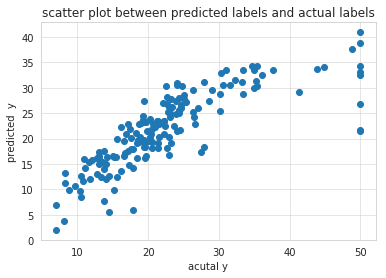

mean squared error 33.21114265570844
0.0


100%|██████████| 167/167 [00:00<00:00, 3946.75it/s]

**************************************************
22.013808417751104
[[-1.1757834   0.39254041 -3.69028653  1.22157116 -1.44916259  0.9270461
  -0.06689782 -3.84491744  2.8873161  -0.74682024 -1.76944939  0.71549132
  -4.63677324]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


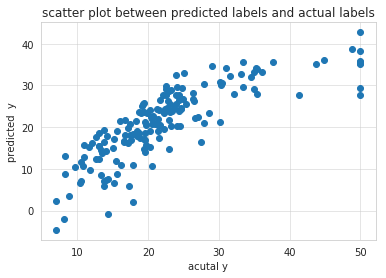

mean squared error 33.97191311224298
0.0


100%|██████████| 167/167 [00:00<00:00, 3964.26it/s]

**************************************************
22.51823910038367
[[-0.96826972  0.10890754  0.37004324 -0.06536064 -0.22022797  4.62371314
  -0.57320351 -0.84403624  1.34648434 -1.37116169 -2.2113704   1.39575191
  -2.75134935]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


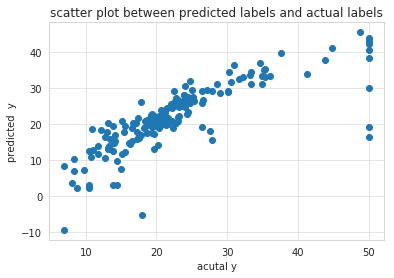

mean squared error 34.35999303243385
0.0


100%|██████████| 167/167 [00:00<00:00, 3730.12it/s]

**************************************************
22.648914305449463
[[-0.89057686  0.22990117 -1.34104102  0.53906646 -2.05637983  2.60230533
   0.22015452 -2.21626607  2.81625448 -1.31324582 -2.13355263  0.19428995
  -2.83565821]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


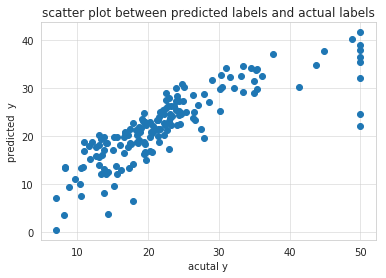

mean squared error 28.714101018825
0.0


100%|██████████| 167/167 [00:00<00:00, 3640.32it/s]

**************************************************
21.861839033954645
[[-1.60498504  0.47732508 -2.37646169  0.88700554 -3.04325645  0.52603223
   1.22329559 -3.2020892   2.66340405  0.34335192 -2.60909248  0.67748398
  -5.00856203]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


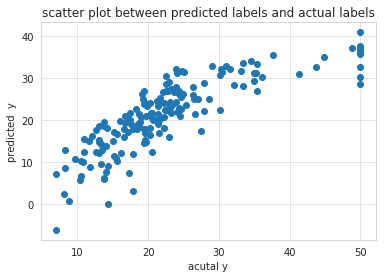

mean squared error 32.127935117622194
0.0


100%|██████████| 167/167 [00:00<00:00, 3871.40it/s]

**************************************************
23.01211199023424
[[-1.93456694  0.33860904  1.59473869 -0.02907305 -3.74568242  1.27413778
   1.44562539 -2.67618644  3.66425376 -0.69916516 -2.86187518  1.86018685
  -5.8356599 ]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


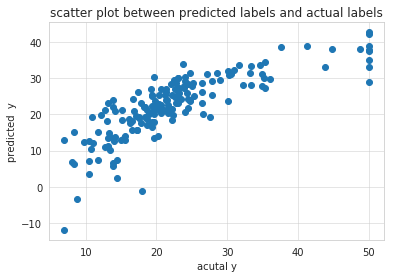

mean squared error 33.75071300742868
0.0


100%|██████████| 167/167 [00:00<00:00, 3933.29it/s]

**************************************************
22.40544233440261
[[-0.87768624  1.41993577 -0.07106279  1.15811418 -2.33057082  1.88277941
  -0.54921422 -3.42527092  2.8688396  -1.62699295 -1.94649436  0.58895703
  -2.66239666]]
**************************************************
scatter plot to view the relationship between actual label and predicted label


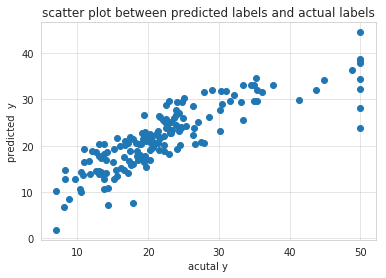

mean squared error 27.548065673387992


In [16]:
c_arr = []
for i in range(10):
  custom_arr = Custom_SGD(1000, data_train_std, label_trian, data_test_std, label_test, 80)
  c_arr.append(custom_arr)

# Conclusions

In [17]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Type", "Iterations", "step size", "mean sqared Error", "weights", "intercept"]

x.add_row(sklearn_arr)
for i in range(10):
  x.add_row(c_arr[i])
print(x)

+---------+------------+-----------+--------------------+---------------------------------------------------------------------------+--------------------+
|   Type  | Iterations | step size | mean sqared Error  |                                  weights                                  |     intercept      |
+---------+------------+-----------+--------------------+---------------------------------------------------------------------------+--------------------+
| sklearn |    1000    |  optimal  | 28.008636071036307 |  [-1.02761828  0.68612111 -0.13738803  0.13864565 -1.46747962  2.74687864 |   [22.55712818]    |
|         |            |           |                    |   -0.21241951 -3.03224924  2.67764872 -1.76887314 -2.03457857  1.16632248 |                    |
|         |            |           |                    |                                -3.25575538]                               |                    |
|  custom |    1000    |   custom  | 32.25754620617092  | [[ 0.5194265

**Custom base model giving less error than sklearn based sgd with same number of iterations but with learning rate 0.01**

**Custom implemetation giving different kind of error for same combinations because of random picking of data points using batch size**